In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:5000]
y_test = y_test[:5000]

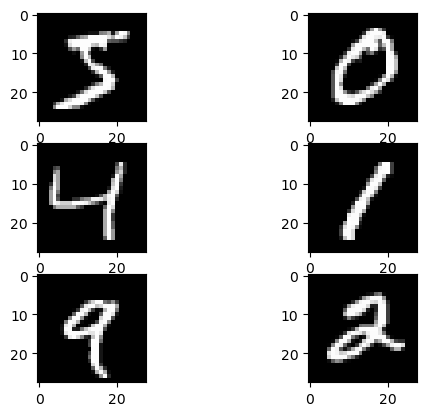

In [5]:
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.show()

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
y_train

array([5, 0, 4, ..., 6, 9, 7], dtype=uint8)

In [8]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat.shape

(10000, 10)

In [9]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
X_train.shape

(10000, 28, 28, 1)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten
import keras.backend as K

In [17]:
K.clear_session()

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 128)               346240    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
__________________________________________________

In [19]:
model.fit(X_train, y_train_cat, epochs=10)

Epoch 1/10
313/313 [==============================] - 2s 5ms/step - loss: 0.4206 - accuracy: 0.8757
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 0.1685 - accuracy: 0.9507
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 0.1023 - accuracy: 0.9691
Epoch 4/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0653 - accuracy: 0.9811
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0459 - accuracy: 0.9873
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0355 - accuracy: 0.9893
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0217 - accuracy: 0.9943
Epoch 8/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0185 - accuracy: 0.9949
Epoch 9/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0120 - accuracy: 0.9972
Epoch 10/10
313/313 [==============================] - 2s 8ms/step - loss: 0.0075 - accuracy: 0.9983

In [21]:
loss, acc = model.evaluate(X_test, y_test_cat)
print('loss: ', loss, 'Accuracy: ', acc)

157/157 [==============================] - 1s 4ms/step - loss: 0.1328 - accuracy: 0.9628
loss:  0.13277368247509003 Accuracy:  0.9628000259399414


(3, 3, 1)


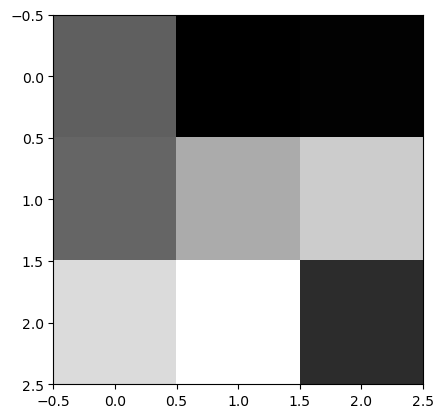

(3, 3, 1)


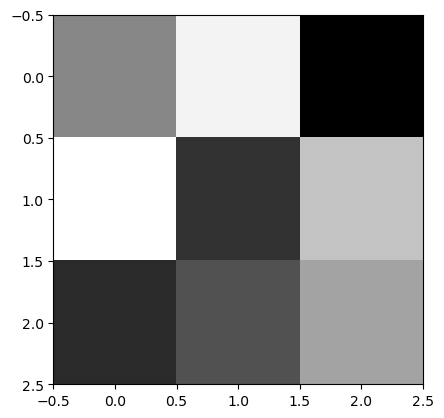

(3, 3, 1)


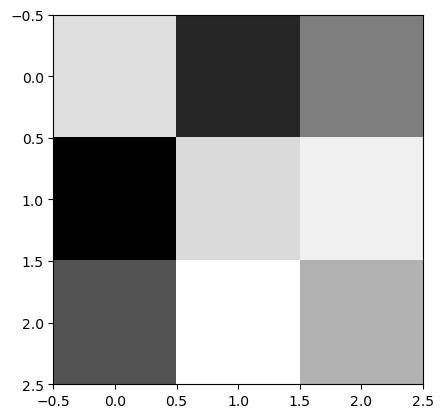

(3, 3, 1)


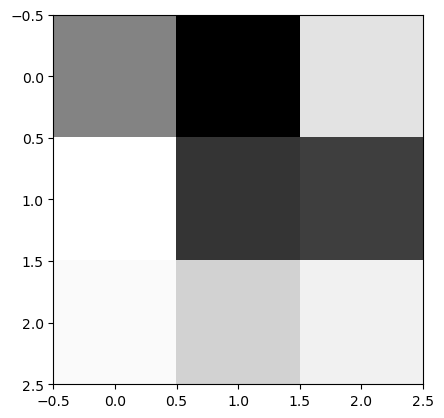

(3, 3, 1)


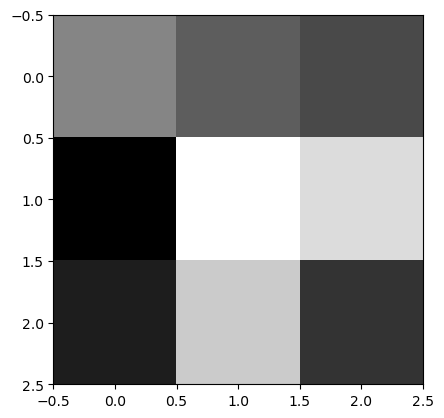

(3, 3, 1)


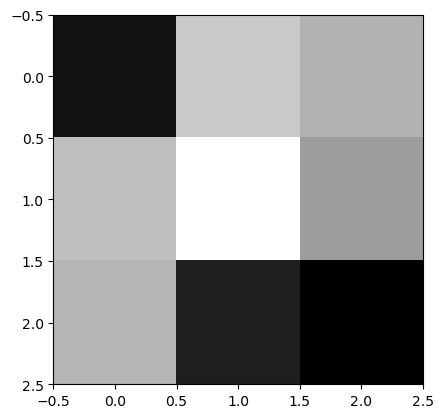

In [22]:
filters, biases = model.layers[0].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
for i in range(6):
    f = filters[:, :, :, i]
    print(f.shape)
    plt.imshow(f, cmap='gray')
    plt.show()

In [26]:
y_test_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_prob, axis=1)

157/157 [==============================] - 1s 3ms/step


In [27]:
confusion_matrix(y_test, y_test_pred)

array([[455,   0,   1,   0,   0,   0,   3,   0,   1,   0],
       [  0, 563,   6,   0,   0,   0,   0,   1,   1,   0],
       [  4,   2, 510,   2,   2,   0,   1,   6,   2,   1],
       [  0,   0,   5, 487,   0,   3,   0,   5,   0,   0],
       [  0,   0,   2,   0, 484,   0,   6,   0,   1,   7],
       [  3,   1,   1,   6,   0, 430,   6,   1,   6,   2],
       [  7,   3,   1,   0,   2,   2, 444,   1,   2,   0],
       [  0,   4,   9,   4,   2,   0,   0, 481,   2,  10],
       [  5,   1,   5,   2,   3,   0,   0,   5, 461,   7],
       [  3,   2,   1,   1,   9,   1,   0,   3,   1, 499]], dtype=int64)

In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       460
           1       0.98      0.99      0.98       571
           2       0.94      0.96      0.95       530
           3       0.97      0.97      0.97       500
           4       0.96      0.97      0.97       500
           5       0.99      0.94      0.96       456
           6       0.97      0.96      0.96       462
           7       0.96      0.94      0.95       512
           8       0.97      0.94      0.95       489
           9       0.95      0.96      0.95       520

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000

